In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cycles_exemple = [0, 50, 200]


In [2]:
ts_data = {}

for i in [1, 2, 3, 4]:
    ts = pd.read_csv(f"TS{i}.txt", sep="\t", header=None)
    ts_data[f"TS{i}"] = ts
    print(f"TS{i} shape :", ts.shape)


TS1 shape : (2205, 60)
TS2 shape : (2205, 60)
TS3 shape : (2205, 60)
TS4 shape : (2205, 60)


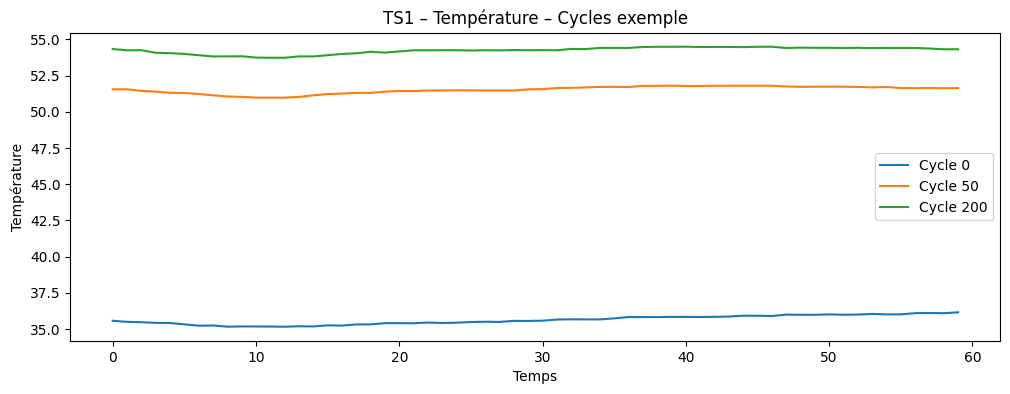

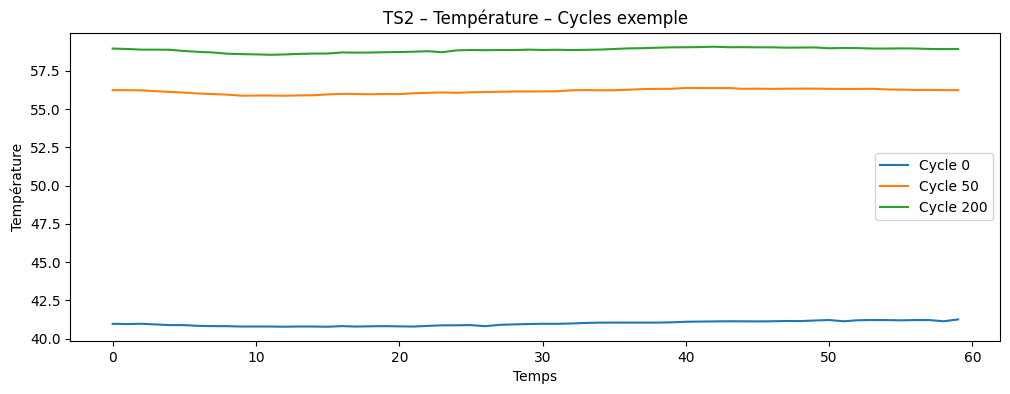

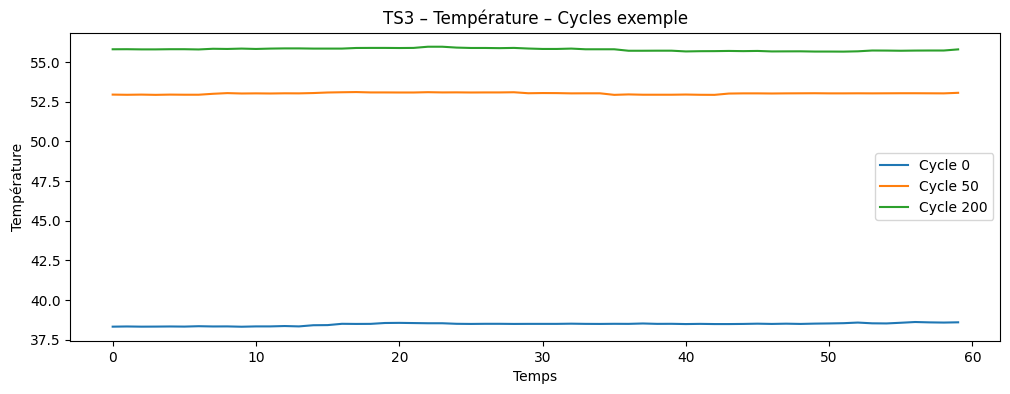

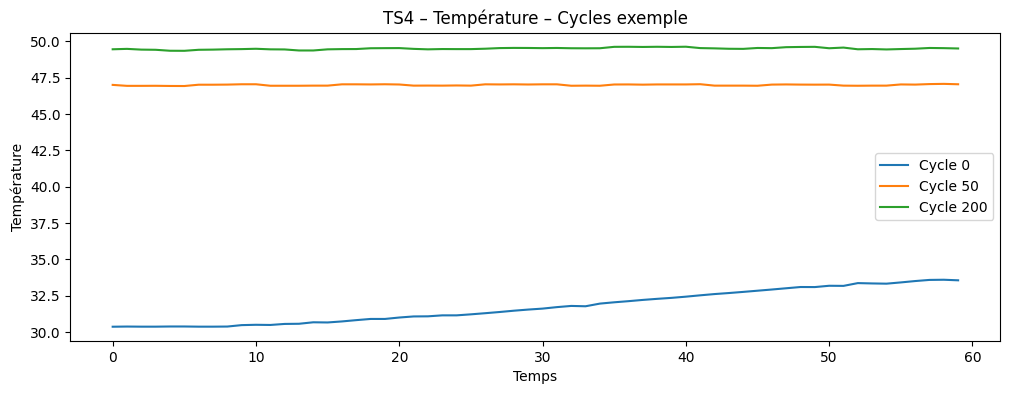

In [3]:
for i in [1, 2, 3, 4]:
    ts = ts_data[f"TS{i}"]

    plt.figure(figsize=(12, 4))
    for c in cycles_exemple:
        plt.plot(ts.iloc[c], label=f"Cycle {c}")

    plt.title(f"TS{i} – Température – Cycles exemple")
    plt.xlabel("Temps")
    plt.ylabel("Température")
    plt.legend()
    plt.show()


C:\Users\boudi\AppData\Local\Temp\ipykernel_34996\4183837551.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ts_mean, ts_median], labels=["Mean", "Median"])


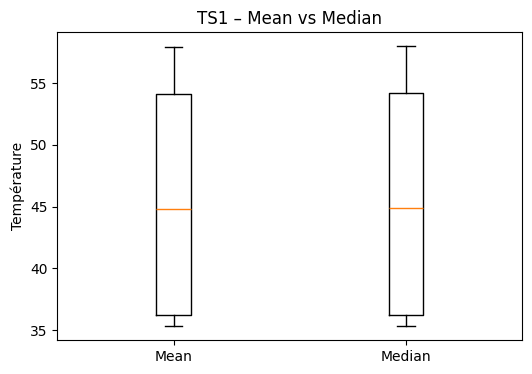

C:\Users\boudi\AppData\Local\Temp\ipykernel_34996\4183837551.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ts_mean, ts_median], labels=["Mean", "Median"])


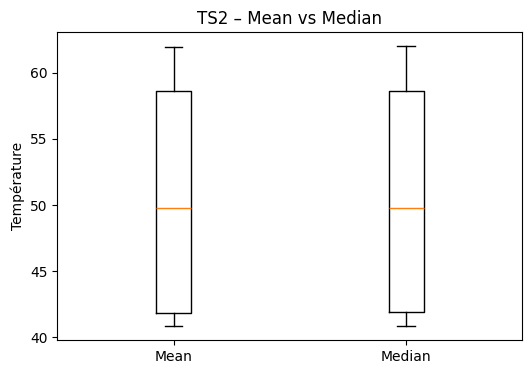

C:\Users\boudi\AppData\Local\Temp\ipykernel_34996\4183837551.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ts_mean, ts_median], labels=["Mean", "Median"])


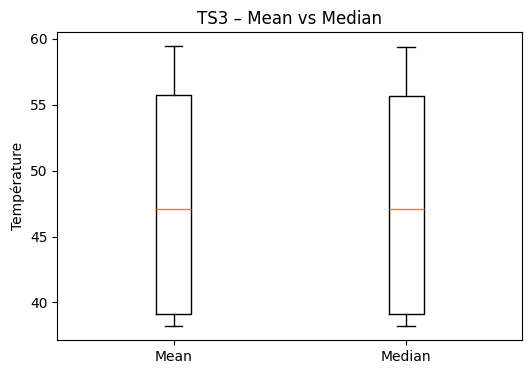

C:\Users\boudi\AppData\Local\Temp\ipykernel_34996\4183837551.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ts_mean, ts_median], labels=["Mean", "Median"])


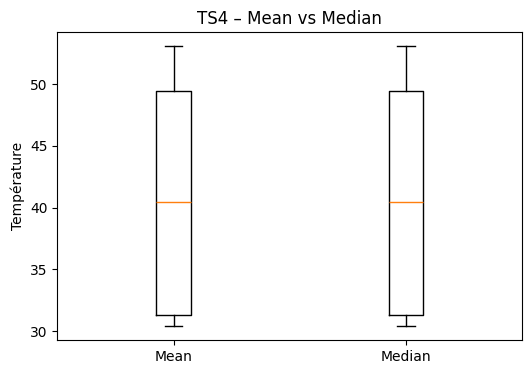

In [4]:
for i in [1, 2, 3, 4]:
    ts = ts_data[f"TS{i}"]

    ts_mean = ts.mean(axis=1)
    ts_median = ts.median(axis=1)

    plt.figure(figsize=(6, 4))
    plt.boxplot([ts_mean, ts_median], labels=["Mean", "Median"])
    plt.title(f"TS{i} – Mean vs Median")
    plt.ylabel("Température")
    plt.show()


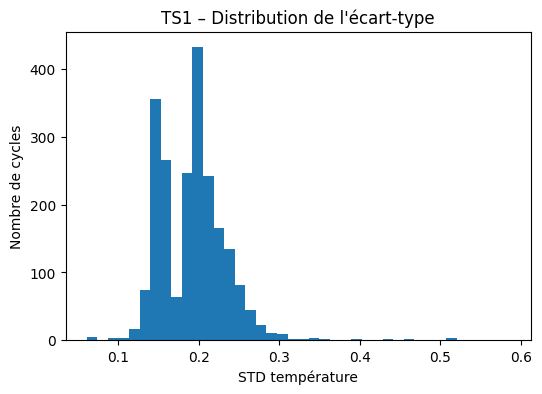

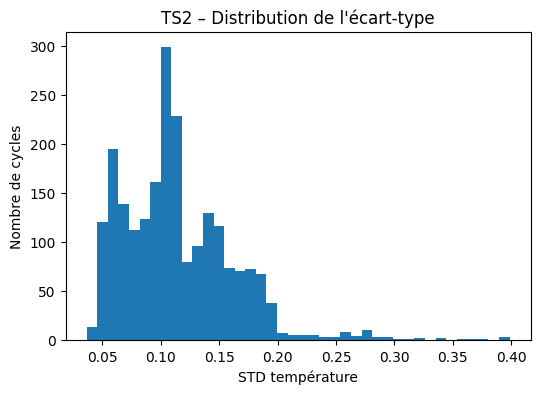

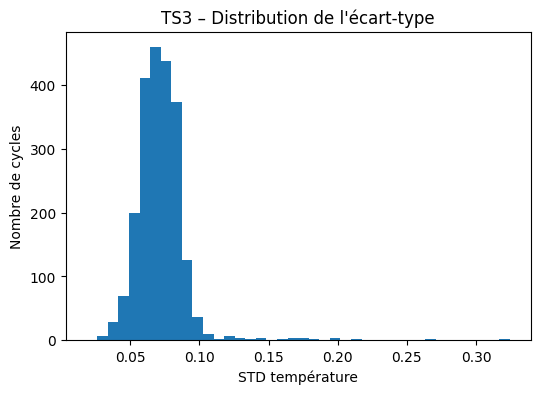

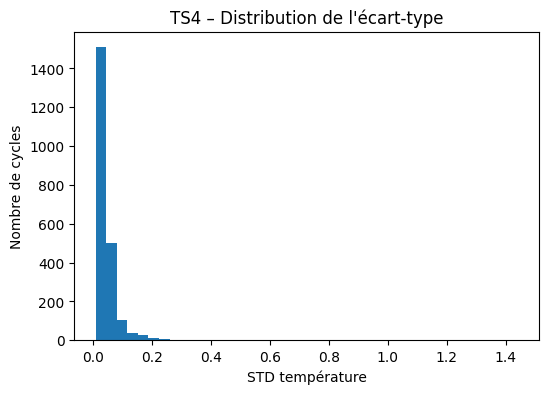

In [5]:
for i in [1, 2, 3, 4]:
    ts = ts_data[f"TS{i}"]
    ts_std = ts.std(axis=1)

    plt.figure(figsize=(6, 4))
    plt.hist(ts_std, bins=40)
    plt.title(f"TS{i} – Distribution de l'écart-type")
    plt.xlabel("STD température")
    plt.ylabel("Nombre de cycles")
    plt.show()

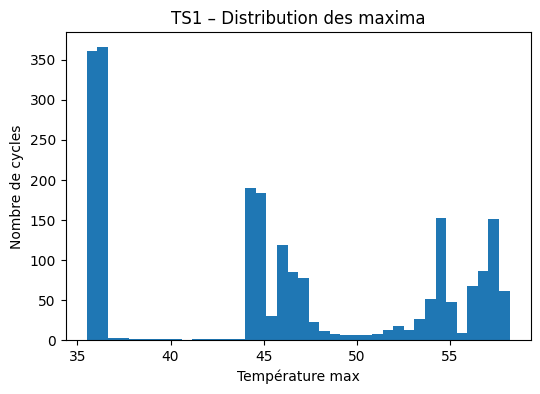

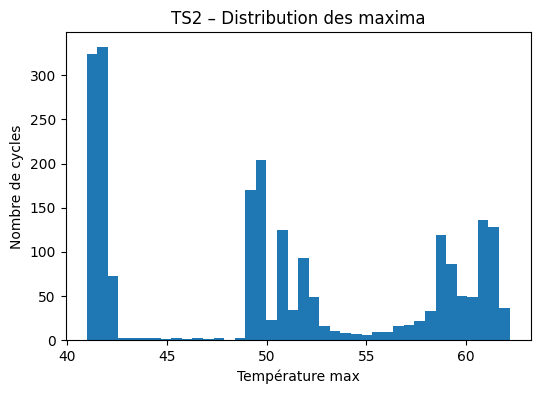

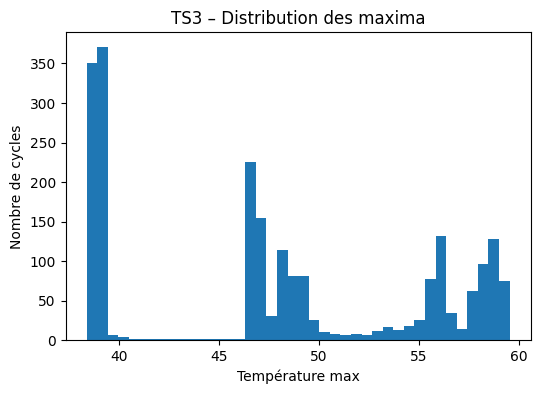

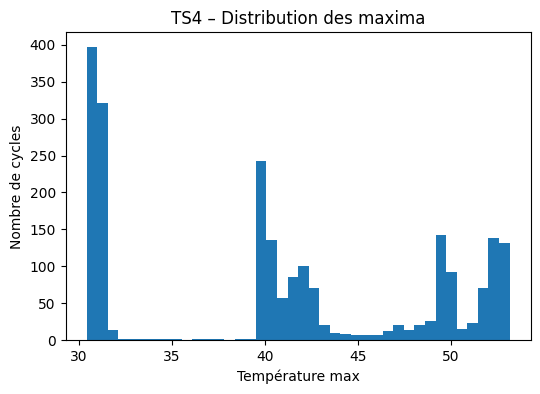

In [6]:
for i in [1, 2, 3, 4]:
    ts = ts_data[f"TS{i}"]
    ts_max = ts.max(axis=1)

    plt.figure(figsize=(6, 4))
    plt.hist(ts_max, bins=40)
    plt.title(f"TS{i} – Distribution des maxima")
    plt.xlabel("Température max")
    plt.ylabel("Nombre de cycles")
    plt.show()


In [9]:
import pandas as pd
import numpy as np
# FICHIERS TS
ts_files = {
    "TS1": "TS1.txt",
    "TS2": "TS2.txt",
    "TS3": "TS3.txt",
    "TS4": "TS4.txt"
}


def extract_ts_features(file_path, sensor_name):
    
    ts = pd.read_csv(file_path, sep="\t", header=None)

    df = pd.DataFrame({
        f"{sensor_name}_mean": ts.mean(axis=1),
        f"{sensor_name}_max": ts.max(axis=1),
        f"{sensor_name}_std": ts.std(axis=1)
    })

    return df

#DATASET TS
ts_features = []

for sensor, file in ts_files.items():
    df_ts = extract_ts_features(file, sensor)
    ts_features.append(df_ts)

TS_dataset = pd.concat(ts_features, axis=1)

# index = cycle
TS_dataset["cycle"] = TS_dataset.index
TS_dataset.set_index("cycle", inplace=True)
TS_dataset.to_csv("dataset_TS.csv")

print("dataset_TS.csv sauvegardé :", TS_dataset.shape)
print("DATASET TS FEATURES PAR CYCLE")
print(TS_dataset.head())
print("\nShape :", TS_dataset.shape)


dataset_TS.csv sauvegardé : (2205, 12)
DATASET TS FEATURES PAR CYCLE
        TS1_mean  TS1_max   TS1_std   TS2_mean  TS2_max   TS2_std   TS3_mean  \
cycle                                                                          
0      35.621983   36.152  0.308230  40.978767   41.250  0.154302  38.471017   
1      36.676967   37.488  0.585740  41.532767   42.105  0.338234  38.978967   
2      37.880800   38.621  0.559169  42.442450   43.039  0.390588  39.631950   
3      38.879050   39.473  0.516176  43.403983   43.988  0.398476  40.403383   
4      39.803917   40.391  0.535374  44.332750   44.887  0.372769  41.310550   

       TS3_max   TS3_std   TS4_mean  TS4_max   TS4_std  
cycle                                                   
0       38.613  0.084659  31.745250   33.594  1.116478  
1       39.254  0.176921  34.493867   35.148  0.435312  
2       40.062  0.251133  35.646150   36.141  0.293889  
3       40.934  0.285434  36.579467   36.988  0.262397  
4       41.777  0.293579  37